<a href="https://colab.research.google.com/github/yashveersinghsohi/Hands_On_ML_Book_Practice/blob/master/Chapter_3/Practice_Chapter3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import (
    train_test_split, 
    StratifiedKFold, 
    cross_val_score, 
    cross_val_predict
  )
from sklearn.linear_model import SGDClassifier
from sklearn.base import clone

from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    precision_score, 
    recall_score, 
    f1_score, 
    precision_recall_curve, 
    roc_curve, 
    roc_auc_score
  )

from sklearn.ensemble import RandomForestClassifier

# Data

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X.shape, y.shape

((150, 4), (150,))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
  )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

# Stochastic Gradient Descent (SGD)

In [4]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [5]:
sgd_train_preds = sgd.predict(X_train)
accuracy_score(y_true=y_train, y_pred=sgd_train_preds)

0.675

In [6]:
sgd_preds = sgd.predict(X_test)
accuracy_score(y_true=y_test, y_pred=sgd_preds)

0.6

# Implementing K-Fold Cross-Validation from scratch

In [7]:
skfolds = StratifiedKFold(n_splits=3)

sgd_clf = SGDClassifier(random_state=42)

for train_idx, test_idx in skfolds.split(X_train, y_train):
  X_train_fold = X_train[train_idx]
  X_test_fold = X_train[test_idx]
  
  y_train_fold = y_train[train_idx]
  y_test_fold = y_train[test_idx]
  
  clone_clf = clone(sgd_clf)
  clone_clf.fit(X_train_fold, y_train_fold)

  fold_preds = clone_clf.predict(X_test_fold)
  fold_accuracy = accuracy_score(
      y_true=y_test_fold, 
      y_pred=fold_preds
    )
  
  print(fold_accuracy)

0.95
0.9
0.825


# K-Fold Cross-Validation using sklearn

In [8]:
sgd_clf = SGDClassifier(random_state=42)
cross_val_score(
    estimator=sgd_clf, 
    X=X_train, 
    y=y_train, 
    cv=3, 
    scoring="accuracy"
  )

array([0.95 , 0.9  , 0.825])

# Confusion Matrix

In [9]:
y_train_preds = cross_val_predict(
    estimator=sgd_clf, 
    X=X_train, 
    y=y_train, 
    cv=3
  )

In [10]:
confusion_matrix(y_true=y_train, y_pred=y_train_preds)

array([[40,  0,  0],
       [ 0, 30, 11],
       [ 0,  2, 37]])

In [11]:
pd.DataFrame(
    data=confusion_matrix(y_true=y_train, y_pred=y_train_preds), 
    index=["Actual: 0", "Actual: 1", "Actual: 2"], 
    columns=["Pred: 0", "Pred: 1", "Pred: 2"]
  )

,Pred: 0,Pred: 1,Pred: 2
Actual: 0,40,0,0
Actual: 1,0,30,11
Actual: 2,0,2,37


# Precision, Recall & F1

Precision for each class (class 0, class 1, class 2)

In [12]:
precision_score(y_true=y_train, y_pred=y_train_preds, average=None)

array([1.        , 0.9375    , 0.77083333])

Recall for each class (class 0, class 1, class 2)

In [13]:
recall_score(y_true=y_train, y_pred=y_train_preds, average=None)

array([1.        , 0.73170732, 0.94871795])

F1 for each class (class 0, class 1, class 2)

In [14]:
f1_score(y_true=y_train, y_pred=y_train_preds, average=None)

array([1.        , 0.82191781, 0.85057471])

## Precision-Recall Tradeoff

**For one instance**

In [15]:
sgd.decision_function([X_train[0]])

array([[ 175.36402533, -130.69451   , -924.1974237 ]])

In [16]:
threshold = 0
sgd.decision_function([X_train[0]]) > threshold

array([[ True, False, False]])

In [17]:
y_train[0]

0

**For all instances**

In [18]:
sgd_clf = SGDClassifier(random_state=42)

y_train_scores = cross_val_predict(
    estimator=sgd_clf, 
    X=X_train, 
    y=y_train, 
    cv=3, 
    method="decision_function"
  )

Precision Recall Curve for class 1

In [19]:
precisions, recalls, thresholds = precision_recall_curve(
    y_true=np.where(y_train==1, 1, 0), 
    probas_pred=y_train_scores[:, 1]
  )

No handles with labels found to put in legend.


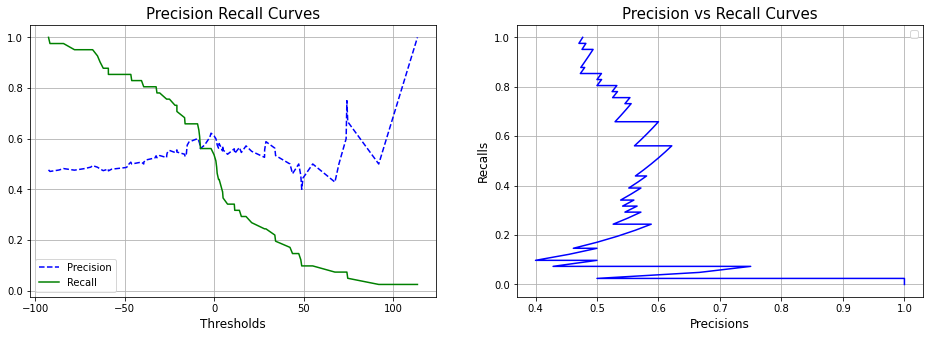

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(thresholds, precisions[:-1], "b--", label="Precision")
ax[0].plot(thresholds, recalls[:-1], "g-", label="Recall")
ax[0].set_xlabel("Thresholds", size=12)
ax[0].set_title("Precision Recall Curves", size=15)
ax[0].legend()
ax[0].grid()

ax[1].plot(precisions, recalls, "b-")
ax[1].set_xlabel("Precisions", size=12)
ax[1].set_ylabel("Recalls", size=12)
ax[1].set_title("Precision vs Recall Curves", size=15)
ax[1].legend()
ax[1].grid()

plt.show()

In [21]:
thresholds[np.argmax(precisions>0.60)], precisions[np.argmax(precisions>0.60)], recalls[np.argmax(precisions>0.60)]

(-2.432327646413391, 0.6052631578947368, 0.5609756097560976)

# The ROC Curve

ROC Curve for class 1

In [24]:
fpr, tpr, thresholds = roc_curve(
    y_true=np.where(y_train==1, 1, 0), 
    y_score=y_train_scores[:, 1]
  )

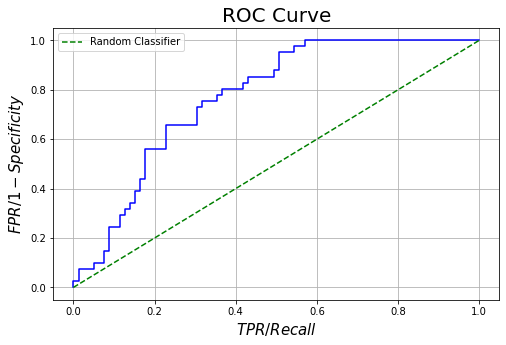

In [38]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(fpr, tpr, "b-")
ax.plot([0, 1], [0, 1], "g--", label="Random Classifier")

ax.grid()
ax.set_xlabel(r"$TPR$/$Recall$", size=15)
ax.set_ylabel(r"$FPR$/$1-Specificity$", size=15)
ax.set_title("ROC Curve", size=20)

ax.legend()
plt.show()

Area under ROC

In [40]:
roc_auc_score(
  y_true=np.where(y_train==1, 1, 0), 
  y_score=y_train_scores[:, 1]
)

0.7699907378820623

## Using Random Forest to compare performance

In [42]:
forest_clf = RandomForestClassifier(random_state=42)
y_forest_proba = cross_val_predict(
    estimator=forest_clf, 
    X=X_train, 
    y=y_train, 
    method="predict_proba"
  )

In [44]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(
    y_true=np.where(y_train==1, 1, 0), 
    y_score=y_forest_proba[:, 1]
  )

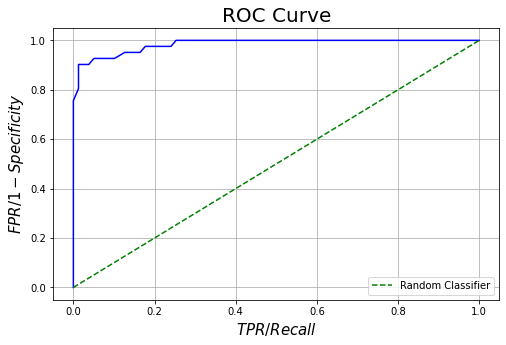

In [45]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(fpr_forest, tpr_forest, "b-")
ax.plot([0, 1], [0, 1], "g--", label="Random Classifier")

ax.grid()
ax.set_xlabel(r"$TPR$/$Recall$", size=15)
ax.set_ylabel(r"$FPR$/$1-Specificity$", size=15)
ax.set_title("ROC Curve", size=20)

ax.legend()
plt.show()

In [46]:
roc_auc_score(
  y_true=np.where(y_train==1, 1, 0), 
  y_score=y_forest_proba[:, 1]
)

0.9844087681383142

# Error Analysis

In [47]:
y_train_preds = cross_val_predict(
    estimator=sgd_clf, 
    X=X_train, 
    y=y_train, 
    cv=3
  )

pd.DataFrame(
    data=confusion_matrix(y_true=y_train, y_pred=y_train_preds), 
    index=["Actual: 0", "Actual: 1", "Actual: 2"], 
    columns=["Pred: 0", "Pred: 1", "Pred: 2"]
  )

,Pred: 0,Pred: 1,Pred: 2
Actual: 0,40,0,0
Actual: 1,0,30,11
Actual: 2,0,2,37


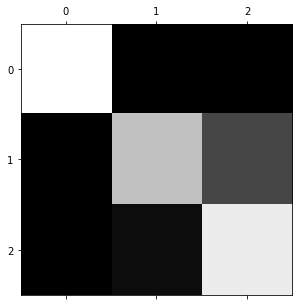

In [52]:
conf_mat = confusion_matrix(y_true=y_train, y_pred=y_train_preds)

fig, ax = plt.subplots(figsize=(8, 5))
ax.matshow(conf_mat, cmap=plt.cm.gray)
plt.show()

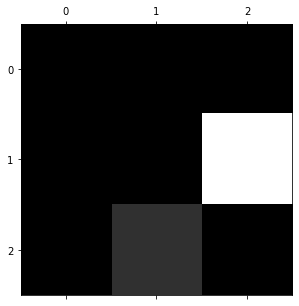

In [53]:
row_sums = conf_mat.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mat / row_sums

np.fill_diagonal(norm_conf_mx, 0)
fig, ax = plt.subplots(figsize=(8, 5))
ax.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()